In [1]:
import geopandas as gpd

In [2]:
from urllib import request

In [3]:
url = "https://www.qgistutorials.com/downloads/ne_10m_populated_places_simple.zip"
fname = 'pop_places.zip'
request.urlretrieve(url, fname)

('pop_places.zip', <http.client.HTTPMessage at 0x1d9a48b42e0>)

In [4]:
from zipfile import ZipFile

file_name = "pop_places.zip"

with ZipFile(file_name, 'r') as zip:
	# zip.printdir()
    zip.extractall()


In [5]:
fname = 'ne_10m_populated_places_simple.shp'
gdf = gpd.read_file(fname)

In [6]:
gdf.head(3)

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,diffascii,nameascii,adm0cap,...,rank_max,rank_min,geonameid,meganame,ls_name,ls_match,checkme,min_zoom,ne_id,geometry
0,10,1,8,Admin-1 capital,Colonia del Sacramento,None,None,0,Colonia del Sacramento,0.0,...,7,7,3443013.0,None,None,0,0,9.0,1159112629,POINT (-57.84000 -34.48000)
1,10,1,8,Admin-1 capital,Trinidad,None,None,0,Trinidad,0.0,...,7,7,3439749.0,None,None,0,0,9.0,1159112647,POINT (-56.90100 -33.54400)
2,10,1,8,Admin-1 capital,Fray Bentos,None,None,0,Fray Bentos,0.0,...,7,7,3442568.0,None,None,0,0,9.0,1159112663,POINT (-58.30400 -33.13900)


In [10]:
gdf['adm0cap'].unique()

array([0., 1.])

In [9]:
gdf.columns

Index(['scalerank', 'natscale', 'labelrank', 'featurecla', 'name', 'namepar',
       'namealt', 'diffascii', 'nameascii', 'adm0cap', 'capalt', 'capin',
       'worldcity', 'megacity', 'sov0name', 'sov_a3', 'adm0name', 'adm0_a3',
       'adm1name', 'iso_a2', 'note', 'latitude', 'longitude', 'changed',
       'namediff', 'diffnote', 'pop_max', 'pop_min', 'pop_other', 'rank_max',
       'rank_min', 'geonameid', 'meganame', 'ls_name', 'ls_match', 'checkme',
       'min_zoom', 'ne_id', 'geometry'],
      dtype='object')

In [11]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
new_gdf = gdf.to_crs('EPSG:26391')

In [17]:
new_gdf.crs

<Derived Projected CRS: EPSG:26391>
Name: Minna / Nigeria West Belt
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Nigeria - onshore west of 6°30'E, onshore and offshore shelf.
- bounds: (2.69, 3.57, 6.5, 13.9)
Coordinate Operation:
- name: Nigeria West Belt
- method: Transverse Mercator
Datum: Minna
- Ellipsoid: Clarke 1880 (RGS)
- Prime Meridian: Greenwich

<AxesSubplot:>

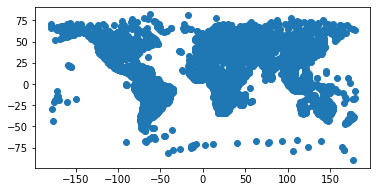

In [18]:
gdf.plot()

In [19]:
gdf.shape

(7343, 39)

In [20]:
gdf.head(100).explore(tiles='http://mt0.google.com/vt/lyrs=y&hl=en&x={x}&y={y}&z={z}',
                      attr='Google Satellite', marker_kwds={'radius':10},
                     style_kwds={'fillColor':'red'},popup=['name','adm0cap','pop_max'])

In [24]:
mask1 = gdf['pop_max'] > 1000000
mask2 = gdf["adm0cap"] == 1
gdf_filtered= gdf[mask1 & mask2]

0       False
1       False
2       False
3       False
4       False
        ...  
7338     True
7339     True
7340     True
7341     True
7342     True
Name: pop_max, Length: 7343, dtype: bool

In [ ]:
# gdf_filtered2 = gdf[(gdf['pop_max'] > 1000000) & (gdf["adm0cap"] == 1)]

In [25]:
gdf_filtered.shape

(103, 39)

In [27]:
gdf_filtered.explore(tiles='http://mt0.google.com/vt/lyrs=p&hl=en&x={x}&y={y}&z={z}',
                      attr='Google Terrain', marker_kwds={'radius':10},
                     style_kwds={'fillColor':'red'},popup=['name','pop_max'])

In [28]:
gdf_filtered = gdf_filtered[['name', 'pop_max','geometry']]

gdf_filtered_wrong = gdf_filtered[['name', 'pop_max']]

In [29]:
type(gdf_filtered), type(gdf_filtered_wrong)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

In [32]:
gdf_filtered.to_file('populated_capitals.geojson', driver='GeoJSON')

C:\Users\USER\miniconda3\envs\geodata\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [33]:
gpd.read_file('populated_capitals.geojson').explore()

In [30]:
import fiona

In [31]:
fiona.supported_drivers

{'ARCGEN': 'r',
 'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'rw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'GPSTrackMaker': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'raw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'SQLite': 'raw',
 'TopoJSON': 'r'}